# Détection d'anomalies

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Jeu-de-données" data-toc-modified-id="Jeu-de-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Jeu de données</a></span></li><li><span><a href="#Détection-des-anomalies:-Isolation-Forest" data-toc-modified-id="Détection-des-anomalies:-Isolation-Forest-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Détection des anomalies: Isolation Forest</a></span><ul class="toc-item"><li><span><a href="#Prédiction" data-toc-modified-id="Prédiction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prédiction</a></span></li><li><span><a href="#Nombre-d'estimateurs" data-toc-modified-id="Nombre-d'estimateurs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Nombre d'estimateurs</a></span></li></ul></li><li><span><a href="#Décontamination" data-toc-modified-id="Décontamination-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Décontamination</a></span><ul class="toc-item"><li><span><a href="#Visualisation-d'anomalies" data-toc-modified-id="Visualisation-d'anomalies-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualisation d'anomalies</a></span></li><li><span><a href="#Ensemble-des-anomalies" data-toc-modified-id="Ensemble-des-anomalies-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ensemble des anomalies</a></span></li></ul></li></ul></div>

## Jeu de données

Création d'un dataset isotropique (càd pas de tendance particulière dans une direction donnée)

Pour l'exemple, on crée un unique cluster (1 centre), avec 2 variables et 50 échantillons (points). On va préciser un faible écart-type pour concentrer le nuage de points.

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples = 50, n_features=2, centers=1,
                 cluster_std = 0.1, random_state=0)

# on ajoute l'anomalie à détecter
X[-1,:] = np.array([2.5,5])

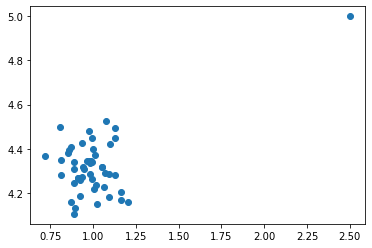

In [20]:
# Visualisation
plt.scatter(X[:,0],X[:,1])
plt.show()

## Détection des anomalies: Isolation Forest

L'algorithme d'Isolation Forest "isole" chaque échantillons en scindant aléatoirement l'ensemble des échantillons d'une variable. 

Il sélectionne aléatoirement une variable et puis choisi aléatoirement une *valeur de division* entre les valeurs maximale et minimale de la variable sélectionnée.

Les anomalies, ou *outlier*, ont une plus grande probabilité d'être isolées.


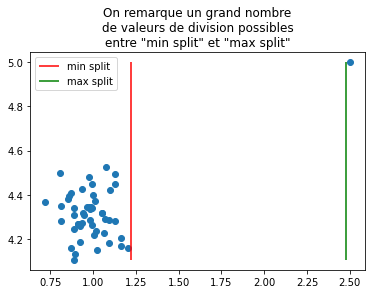

In [23]:
plt.scatter(X[:,0],X[:,1])
plt.title('On remarque un grand nombre\nde valeurs de division possibles\nentre "min split" et "max split"')
plt.vlines(1.22,min(X[:,1]),max(X[:,1]), color='r', label='min split')  # vlines(x,ymin,ymax)
plt.vlines(2.48,min(X[:,1]),max(X[:,1]), color='g', label='max split')
plt.legend()
plt.show()

L'algorithme prend un paramètre `contamination` en entrée, c'est le pourcentage d'anomalie estimé a priori.

Pour choisir la valeur de contamination:
- on utilise la valeur qu'on trouve habituellement dans la documentation
- on estime en visualisant les données
- on procède par essai-erreur

Ici, on met 10%.

Par défault, l'algorithme effectue une centaine de split

In [24]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=0)

model.fit(X)

IsolationForest(contamination=0.01, random_state=0)

### Prédiction

On va prédire pour chaque échantillon, s'il est une anomalie ou pas

In [3]:
pred = model.predict(X)
# ou 1 = normal (inlier)
# -1 = anomalie probable (outlier)
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

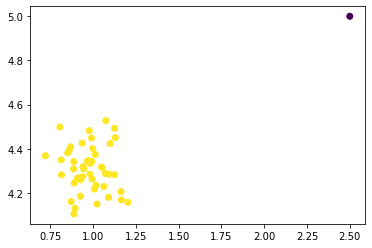

In [4]:
plt.scatter(X[:,0],X[:,1], c=pred)

### Nombre d'estimateurs

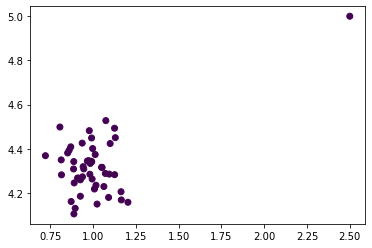

In [5]:
# en changeant le nombre d'estimateur
# s'il n'y a qu'un seul estimateur, on a un Isolation Tree ;)
# Il est évidement insuffisant pour avoir une estimation correcte
model = IsolationForest(contamination=0.01, n_estimators=1,random_state=0)
model.fit(X)
pred = model.predict(X)
plt.scatter(X[:,0],X[:,1], c=pred)

In [6]:
np.array(model.estimators_samples_).shape

(1, 50)

## Décontamination

Objectif de l'exercice: au sein du *Digits dataset* de Scikit-Learn, trouver les anomalies et les éliminer.

Dans le dataset, chaque échantillon est une image (matrice 8x8) d'un nombre de 0 à 9.

| type|value|
|-      :|:-|
|Classes |10|
|Samples per class |~180|
|Samples total |1797|
|Dimensionality |64|
|Features |integers 0-16|

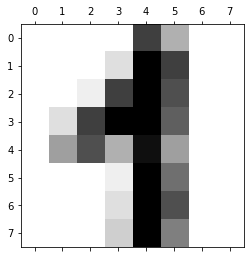

In [18]:
from sklearn.datasets import load_digits

digits = load_digits() # return un bunch

images = digits.images
X = digits.data
y = digits.target

plt.matshow(images[42], cmap='binary') 
plt.show() 

In [19]:
model = model = IsolationForest(contamination=0.02, n_estimators=100,random_state=0)

# contamination généralement une petite proportion 10% max
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [21]:
pred = model.predict(X)
# crée un masque qui marque à True les anomalies
mask = pred==-1
# On applique le masque
outliers= images[mask]
outliers.shape # ou mask.sum() pour connaître le nombre d'anomalies trouvées

(36, 8, 8)

### Visualisation d'anomalies

Text(0.5, 1.0, '2')

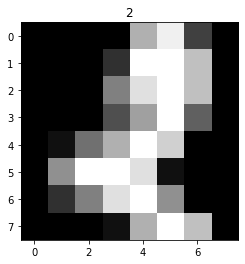

In [27]:
plt.imshow(outliers[0])
plt.title(y[mask][0])

Text(0.5, 1.0, '5')

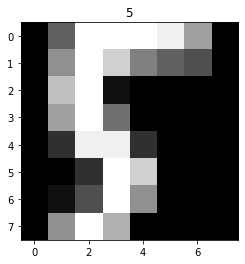

In [28]:
plt.imshow(outliers[1])
plt.title(y[mask][1])

### Ensemble des anomalies

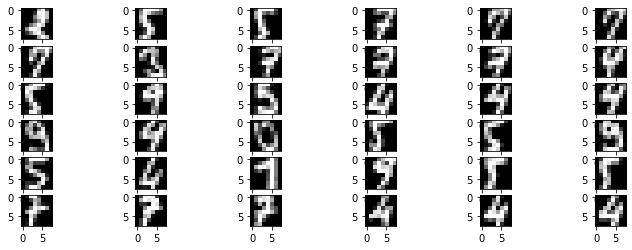

In [41]:
plt.figure(figsize=(12,4))
row = 6
column = int(outliers.shape[0]/row)
i=0
for img in outliers:
    i=i+1
    plt.subplot(row,column,i)
    plt.imshow(img)